# Prediction using Decision Tree Algorithm (Task 6)

### Seunghyun Nam

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("/content/Iris.csv")

print(f"First few rows of the dataset: \n{data.head()}")

print(f"\nSummary Statistics of the dataset: \n{data.describe()}")

print(f"\nBasic Information about the dataset: \n{data.info()}")

First few rows of the dataset: 
   Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0   1            5.1           3.5            1.4           0.2  Iris-setosa
1   2            4.9           3.0            1.4           0.2  Iris-setosa
2   3            4.7           3.2            1.3           0.2  Iris-setosa
3   4            4.6           3.1            1.5           0.2  Iris-setosa
4   5            5.0           3.6            1.4           0.2  Iris-setosa

Summary Statistics of the dataset: 
               Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count  150.000000     150.000000    150.000000     150.000000    150.000000
mean    75.500000       5.843333      3.054000       3.758667      1.198667
std     43.445368       0.828066      0.433594       1.764420      0.763161
min      1.000000       4.300000      2.000000       1.000000      0.100000
25%     38.250000       5.100000      2.800000       1.600000      0.300000
50%     75.50

In [ ]:
# Missing Values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
data.drop(columns = ['Id'], inplace = True)

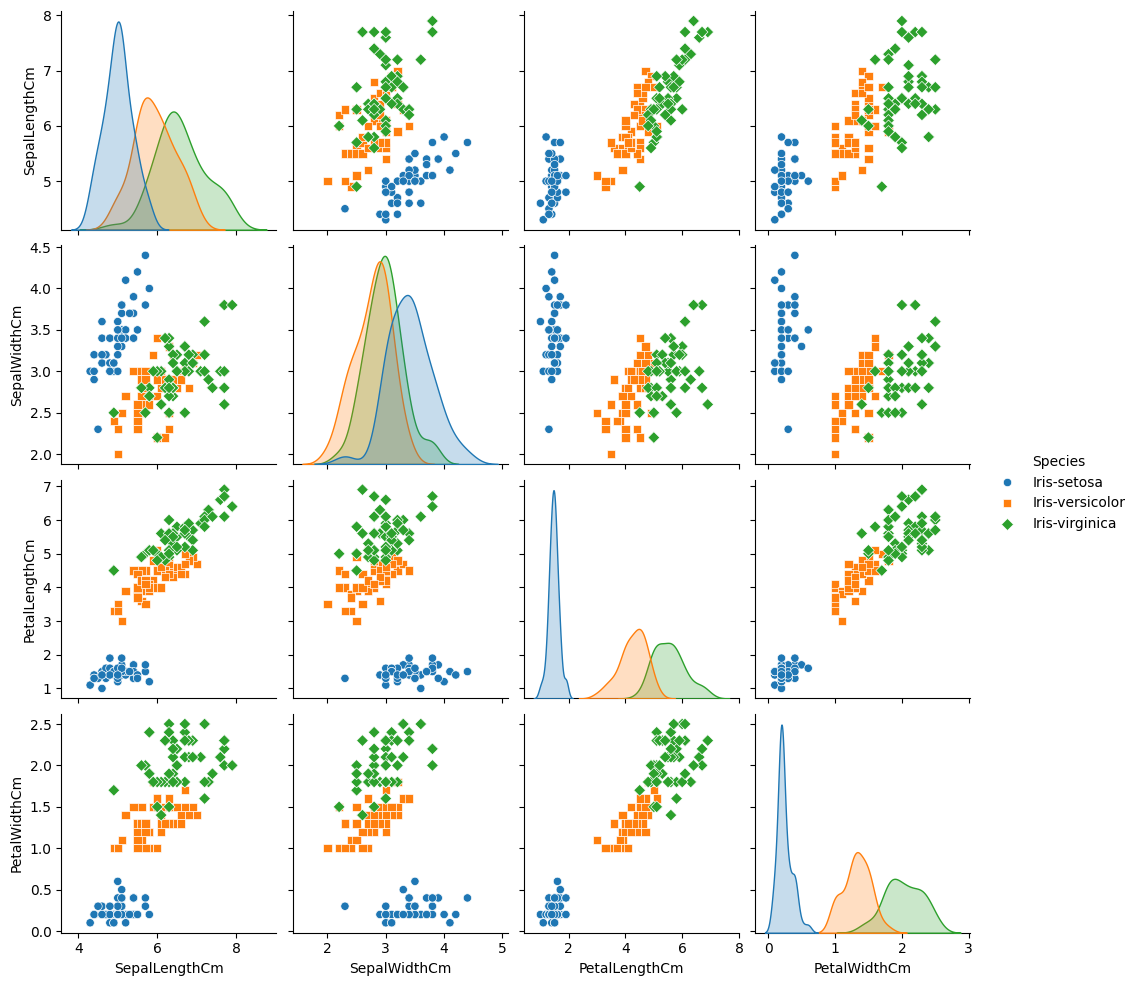

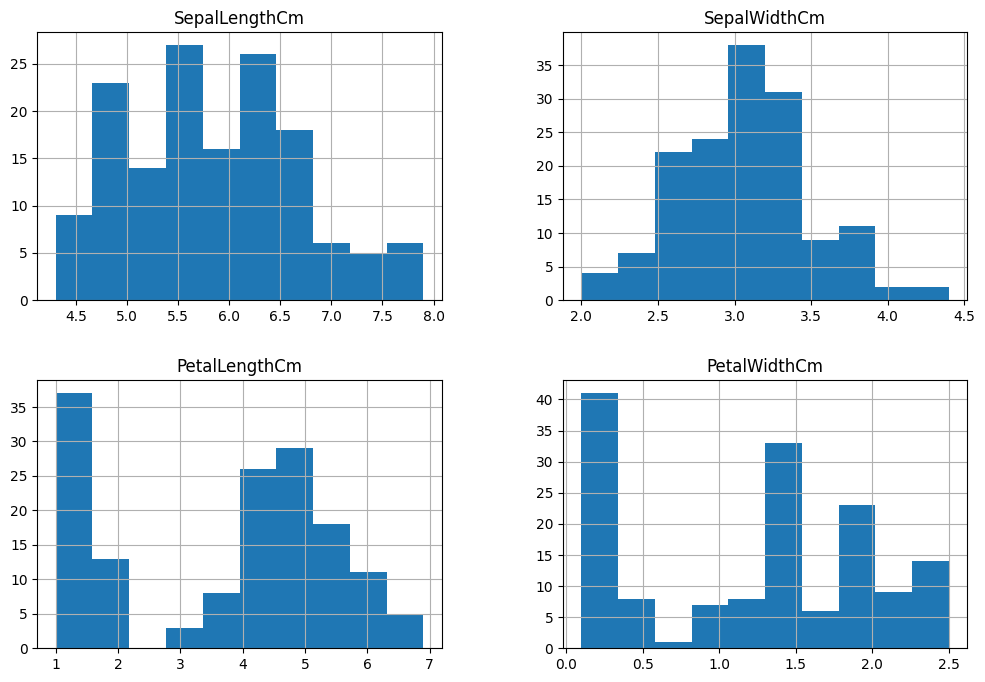

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pairplot Visualization (relationship between features)
sns.pairplot(data, hue = 'Species', markers = ['o', 's', 'D'])
plt.show()

# Distribution Visualization
data.hist(figsize = (12, 8))
plt.show()

### Pairplot
- Iris-Setosa is clearly separated from the other two species (Iris-versicolor and Iris-virginica), while other two species overlap significantly but can be separated to some extent by Petal Length and Petal Width
- Petal Length, Petal Width --> Strong positive correlation
- Sepal Length, Sepal Width --> Weaker correlation

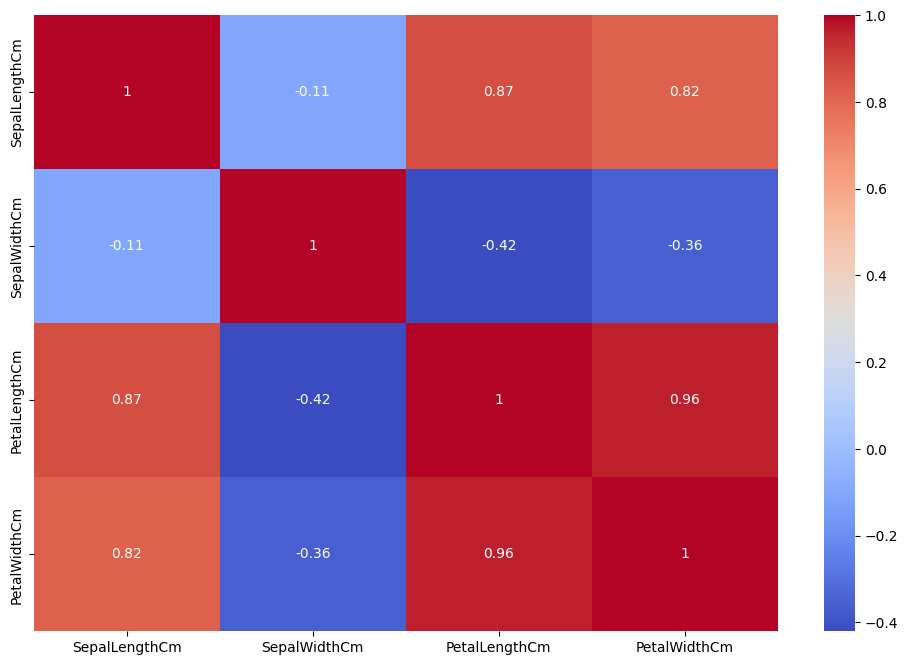

In [ ]:
# Selecting only numerical columns for the correlation matrix
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Correlation Matrix and Heatmap
corr_matrix = numerical_data.corr()

plt.figure(figsize = (12, 8 ))
sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()

### Heat Map

**Strong Positive Relationships:**
- Petal Length and Petal Width are highly correlated, indicating that these two measurements grow together proportionally
- Sepal Length ahs a strong positive correlation with both Petal Length and Petal Width, suggesting a relationship between the length of sepals and petals

**Moderated Negative Relationships:**
- Sepal Width tends to decrease as Petal Length and Petal Width increasem which could suggest a compensatory growth pattern when narrower sepals accompany larger petals

**Weak Relationships:**
- Sepal Length and Sepal Width have a weak negative correlation, indicating that these features do not significantly affect each other

### Decision Tree Classifier

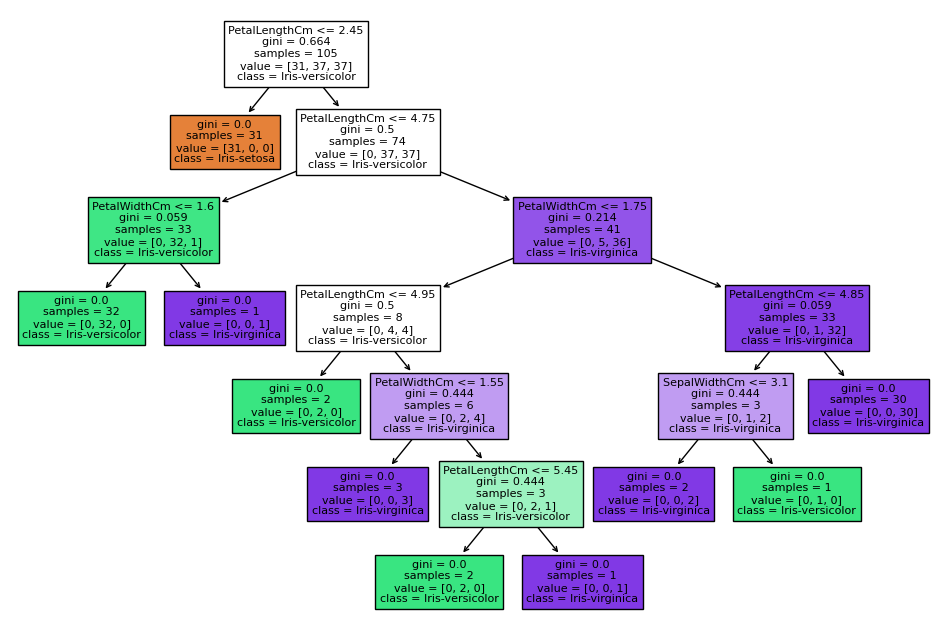

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Splitting the data
X = data.drop(columns = ['Species'])
y = data['Species']

# Encoding the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Splitting the data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

clf = DecisionTreeClassifier(random_state = 42)
clf.fit(X_train, y_train)

plt.figure(figsize = (12, 8))
plot_tree(clf, filled = True, feature_names = X.columns, class_names = label_encoder.classes_)
plt.show()


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average = 'weighted')
recall = recall_score(y_test, y_pred, average = 'weighted')
f1 = f1_score(y_test, y_pred, average = 'weighted')

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1: 1.00


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

class_report = classification_report(y_test, y_pred, target_names = label_encoder.classes_)
print(f"\nClassification Report: \n{class_report}")

Confusion Matrix: 
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report: 
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        19
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00        13

       accuracy                           1.00        45
      macro avg       1.00      1.00      1.00        45
   weighted avg       1.00      1.00      1.00        45



### Confusion Matrix:
- The confusion matrix is a 3x3 matrix that provides a summary of the prediction results on the test set. It shows the number of correct and incorrect predictions made by the classifier, with each row representing the true class and each column representing the predicted class
- 19 instances of Iris-setosa were correctly classified as Iris-setosa
- 13 instances of Iris-versicolor were correctly classified as Iris-versicolor
- 13 instances of Iris-virginica were correctly classified as Iris-virginica
- There are no off-diagonal elements

### Classification Report:
- All classes have a precision of 1.00, indicating perfect precision for each class
- All classes have a recall of 1.00, indicating perfect recall for each class
- All classes have an F1-score of 1.00, indicating perfect balance between precision and recall
- The overall accuracy of the classifier is 1.00 (or 100%), which means the classifier correctly predicted the class for all instances in the test set
